In [74]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [75]:
analysis = scripts.Analysis()

In [76]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1e-20_max_5e-18_ng_7_dlogN_.25_.25_.175_.1_.1_.125',
                          'wgt_1_.85_.7_.6_.5_.4_.4',
                          'midlatitude_summer',
                          'bubd_blayer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [77]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1e-20_max_5e-18_ng_7_dlogN_.25_.25_.175_.1_.1_.125',
                               'wgt_1_.85_.7_.6_.5_.4_.4',
                               'midlatitude_summer',
                               'bubd_blayer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [78]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6, 7]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [79]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [80]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [81]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [82]:
fig.display_hrefanchor()

In [83]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [84]:
table_dgdgs.display_hrefanchor()

In [86]:
for g in [1, 2, 3, 4, 5, 6, 7]:
    s = 'Table: cooling rate. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

In [87]:
for g in [1, 2, 3, 4, 5, 6, 7]:
    s = 'Table: bu, bd and tran3 from irf(). g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

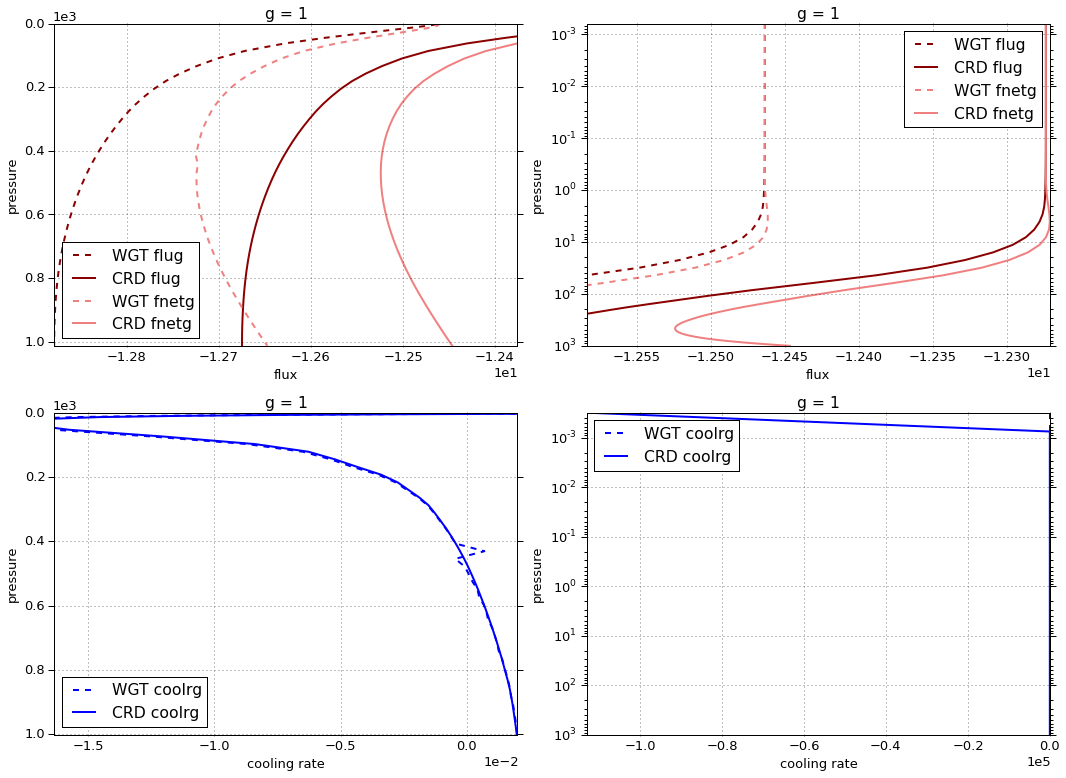

# Figure: flux, cooling rate. g-group 2

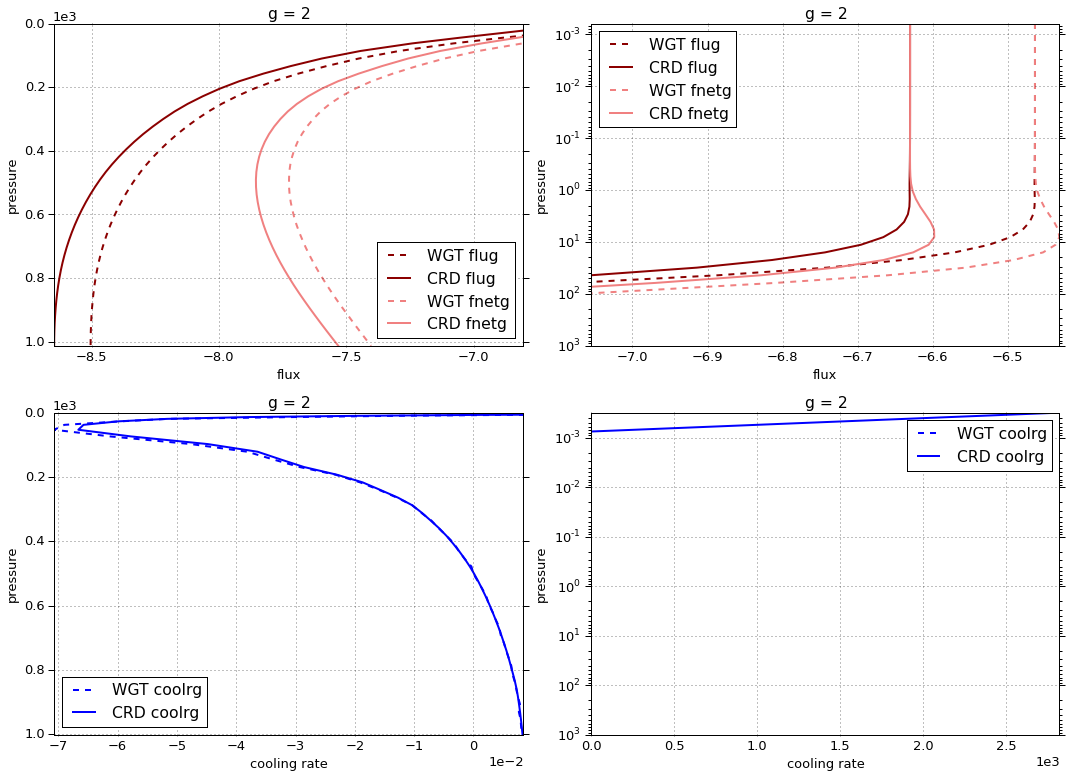

# Figure: flux, cooling rate. g-group 3

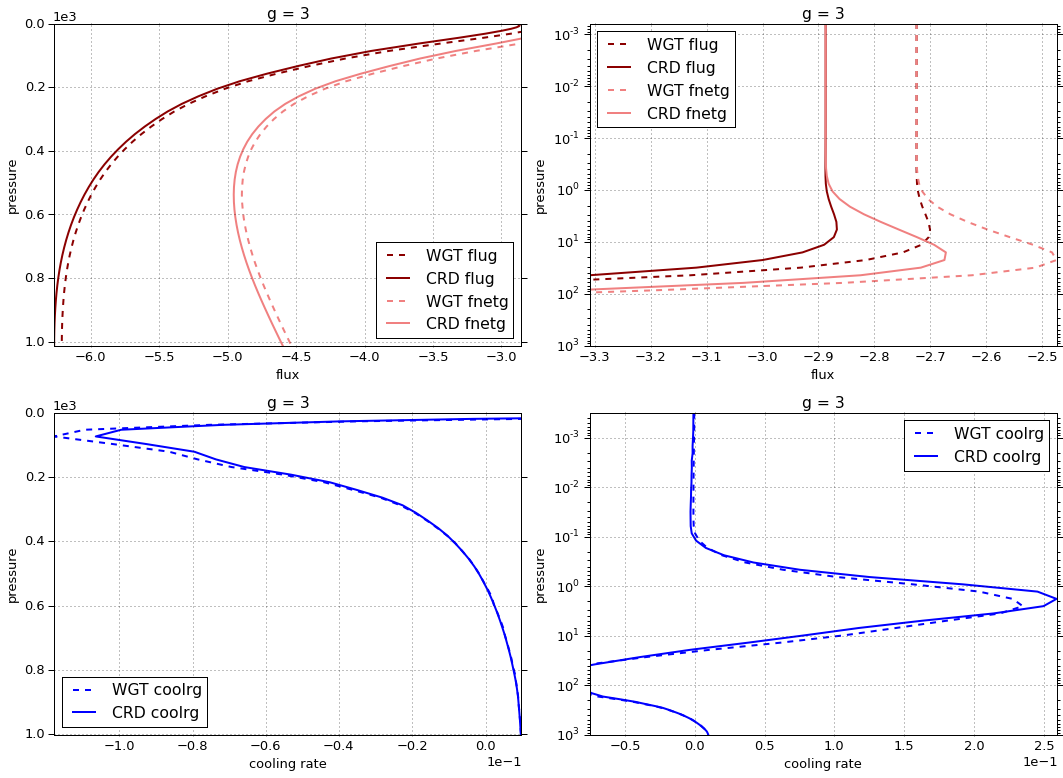

# Figure: flux, cooling rate. g-group 4

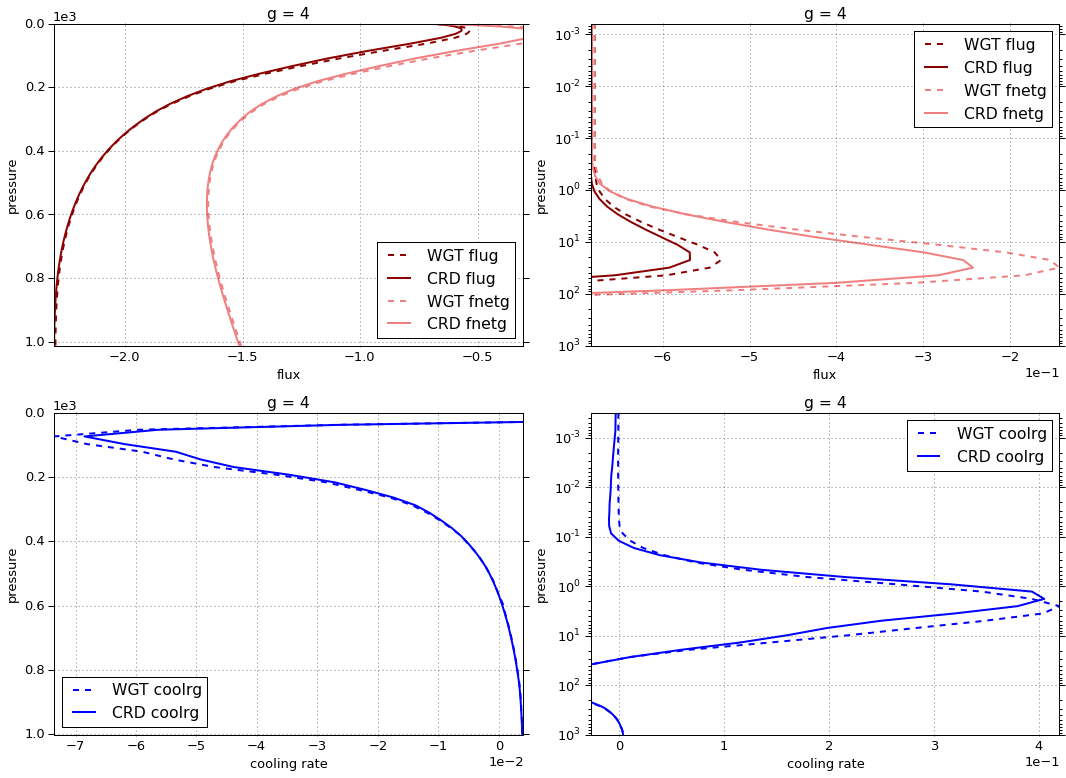

# Figure: flux, cooling rate. g-group 5

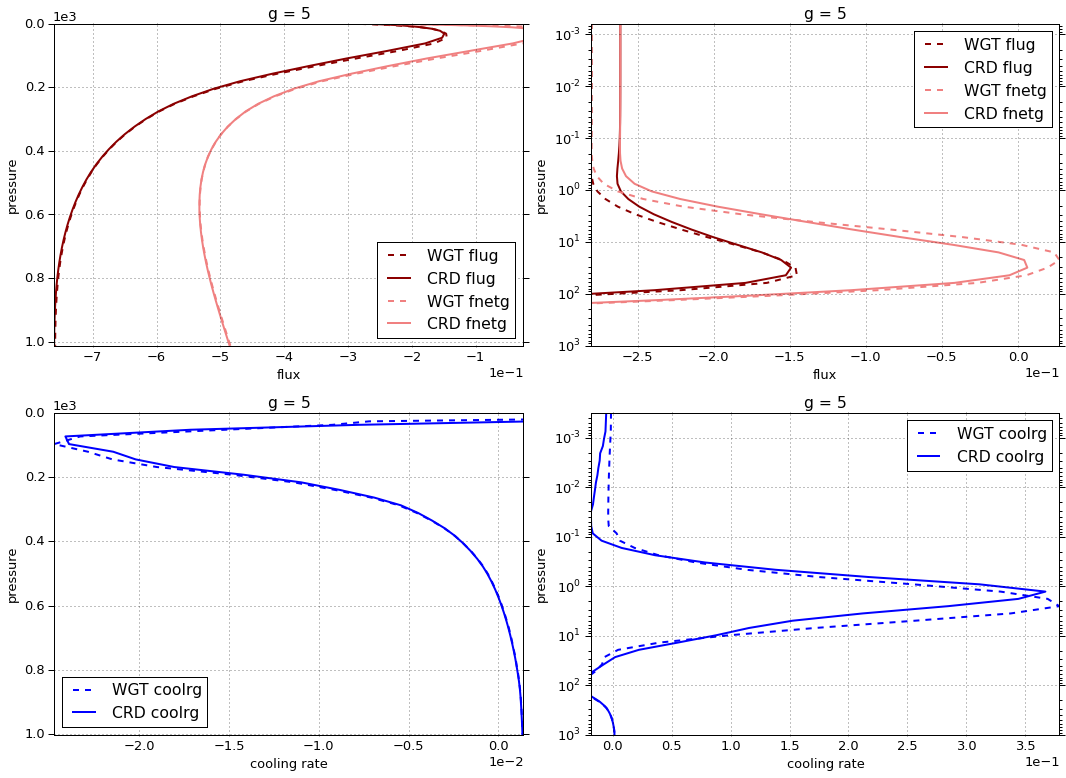

# Figure: flux, cooling rate. g-group 6

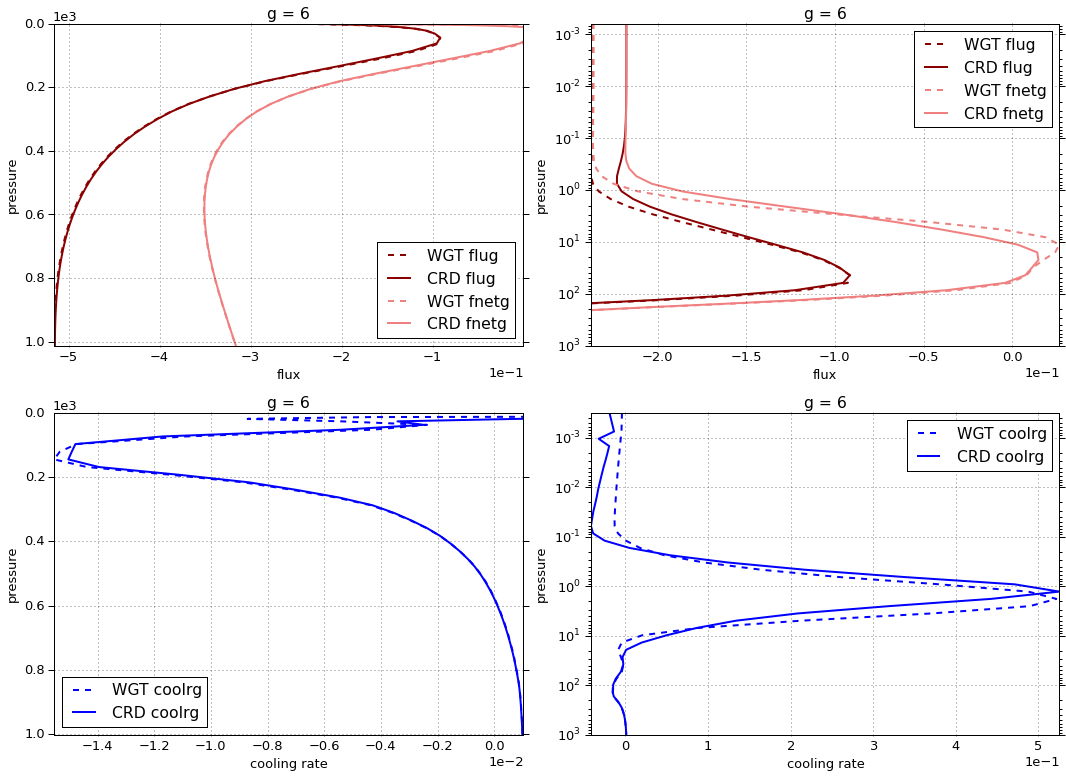

# Figure: flux, cooling rate. g-group 7

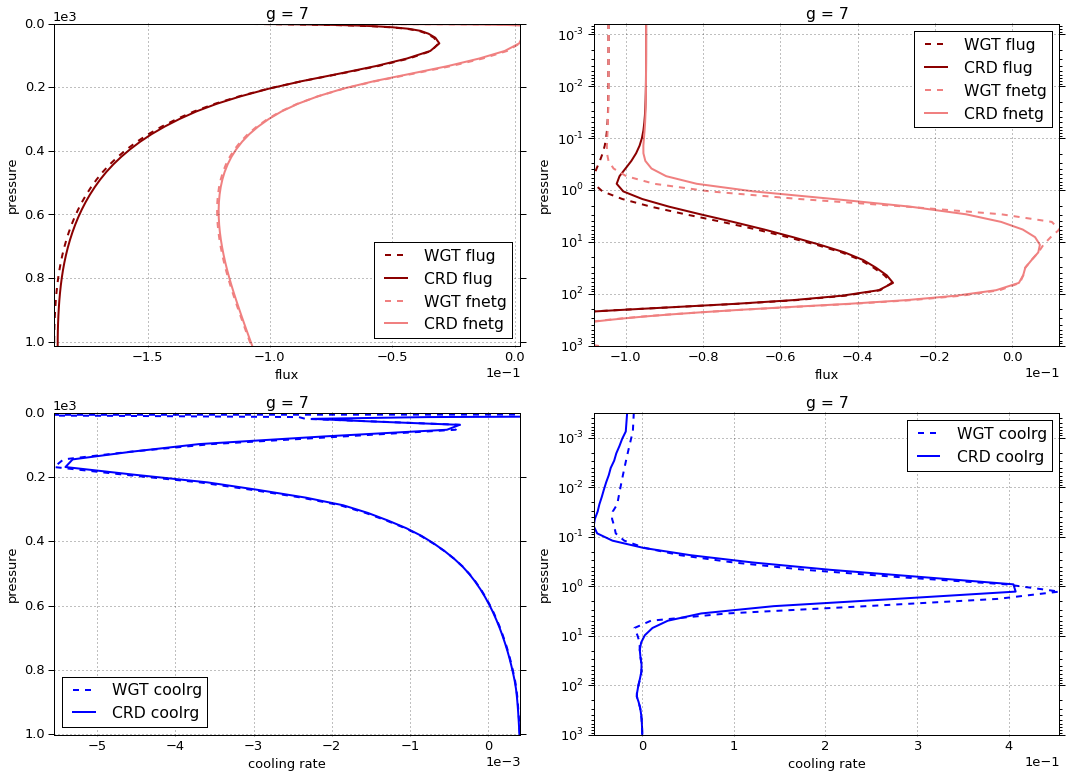

# Figure: flux, cooling rate. g-group total

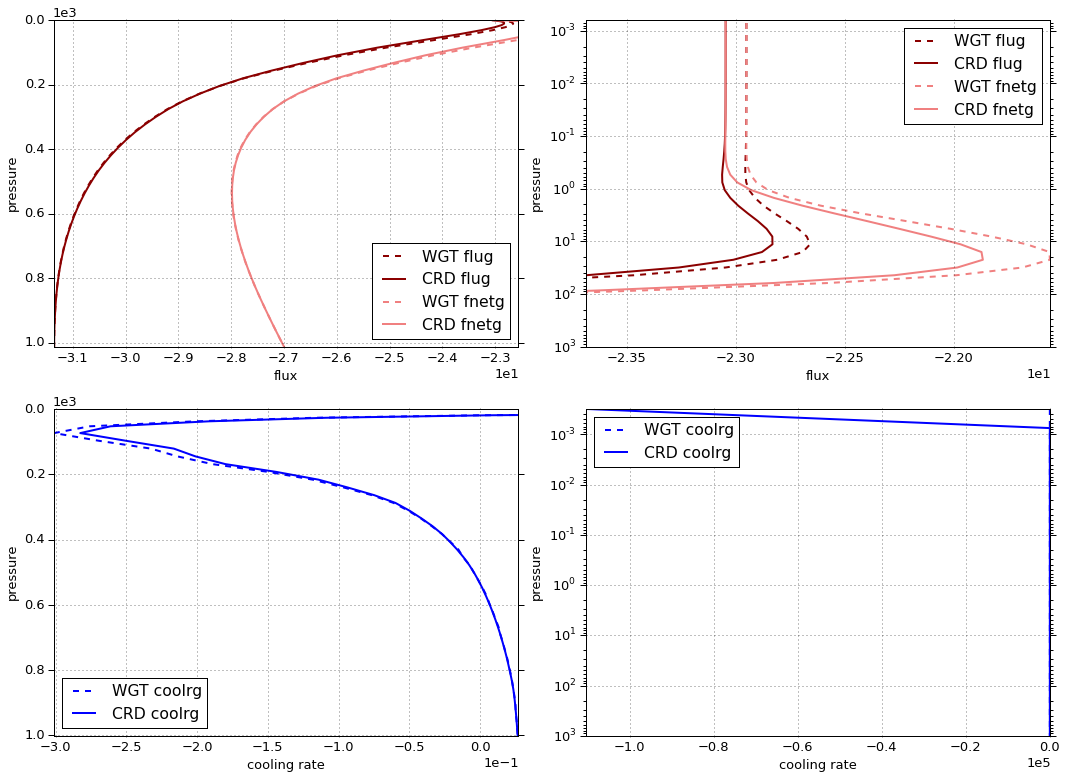

In [88]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [89]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1      -3.903132  0.000000  -3.903132
  1013     76    -12.674908  0.228259 -12.446649
2 0        1      -6.838506  0.000000  -6.838506
  1013     76     -8.646580  1.114884  -7.531696
3 0        1      -2.887191  0.000000  -2.887191
  1013     76     -6.269207  1.671224  -4.597983
4 0        1      -0.681568  0.000000  -0.681568
  1013     76     -2.301027  0.787443  -1.513583
5 0        1      -0.261431  0.000000  -0.261431
  1013     76     -0.760624  0.275026  -0.485597
6 0        1      -0.217637  0.000000  -0.217637
  1013     76     -0.515207  0.198981  -0.316226
7 0        1      -0.094797  0.000000  -0.094797
  1013     76     -0.186683  0.079430  -0.107252


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.463588  0.000000 -12.463588
  1013     76    -12.878752  0.231365 -12.647387
2 0        1      -6.463622  0.000000  -6.463622
  1013     76     -8.503530  1.100454  -7.403076
3 0        1      -2.724582  0.000000  -2.724582
  1013     76     -6.213364  1.678895  -4.534469
4 0        1      -0.678168  0.000000  -0.678168
  1013     76     -2.295391  0.790145  -1.505247
5 0        1      -0.280399  0.000000  -0.280399
  1013     76     -0.759034  0.274624  -0.484410
6 0        1      -0.236310  0.000000  -0.236310
  1013     76     -0.516038  0.199669  -0.316370
7 0        1      -0.104535  0.000000  -0.104535
  1013     76     -0.188125  0.080507  -0.107618


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -8.560456  0.000000 -8.560456
  1013     76    -0.203844  0.003106 -0.200738
2 0        1      0.374884  0.000000  0.374884
  1013     76     0.143050 -0.014430  0.128620
3 0        1      0.162609  0.000000  0.162609
  1013     76     0.055843  0.007671  0.063513
4 0        1      0.003399  0.000000  0.003399
  1013     76     0.005635  0.002701  0.008337
5 0        1     -0.018968  0.000000 -0.018968
  1013     76     0.001590 -0.000403  0.001187
6 0        1     -0.018673  0.000000 -0.018673
  1013     76    -0.000831  0.000688 -0.000143
7 0        1     -0.009737  0.000000 -0.009737
  1013     76    -0.001443  0.001077 -0.000366

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer               
1 0.000312    1     -113167.250000
  1001.112500 75          0.001984
2 0.000312    1        2818.163400
  1001.112500 75          0.008285
3 0.000312    1          -0.001023
  1001.112500 75          0.009597
4 0.000312    1          -0.003081
  1001.112500 75          0.003877
5 0.000312    1          -0.005666
  1001.112500 75          0.001341
6 0.000312    1          -0.019300
  1001.112500 75          0.000986
7 0.000312    1          -0.016021
  1001.112500 75          0.000400


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000228
  1001.112500 75     0.002008
2 0.000312    1     -0.000693
  1001.112500 75     0.008224
3 0.000312    1     -0.000445
  1001.112500 75     0.009677
4 0.000312    1     -0.000543
  1001.112500 75     0.003917
5 0.000312    1     -0.001613
  1001.112500 75     0.001345
6 0.000312    1     -0.004150
  1001.112500 75     0.000990
7 0.000312    1     -0.008780
  1001.112500 75     0.000405


WGT - CRD


coolrg
g pressure    layer               
1 0.000312    1      113167.249772
  1001.112500 75          0.000025
2 0.000312    1       -2818.164093
  1001.112500 75         -0.000061
3 0.000312    1           0.000578
  1001.112500 75          0.000079
4 0.000312    1           0.002539
  1001.112500 75          0.000040
5 0.000312    1           0.004053
  1001.112500 75          0.000004
6 0.000312    1           0.015150
  1001.112500 75          0.000004
7 0.000312    1           0.007241
  1001.112500 75          0.000004

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-14.884260,0.000000,-14.884260
1013,76,-31.354235,4.355248,-26.998988



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-22.951204,0.000000,-22.951204
1013,76,-31.354235,4.355658,-26.998577



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-8.066943e+00,0.00000,-8.066943
1013,76,4.100000e-07,0.00041,0.000411


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-110349.131692
1001.112500,75,0.026470



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.016451
1001.112500,75,0.026565



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,110349.115240
1001.112500,75,0.000094


In [90]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.410750,0.402196
2,0.271208,0.277484
3,0.198167,0.200412
4,0.073208,0.073349
5,0.024208,0.024241
6,0.016458,0.016393
7,0.006000,0.005925


In [91]:
writer = pd.ExcelWriter('results.xlsx')

In [92]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 1

wgt                                 crd                \
                  flug          fldg      fnetg       flug          fldg   
pressure                                                                   
0.000000    -12.463588  0.000000e+00 -12.463588  -3.903132  0.000000e+00   
0.000624    -12.463588  3.359798e-09 -12.463588 -12.273504  3.367796e-09   
0.000876    -12.463588  4.893810e-09 -12.463588 -12.273504  4.905847e-09   
0.001229    -12.463588  7.569938e-09 -12.463588 -12.273504  7.590458e-09   
0.001723    -12.463588  1.210315e-08 -12.463588 -12.273504  1.214061e-08   
0.002417    -12.463588  1.960807e-08 -12.463588 -12.273504  1.967779e-08   
0.003391    -12.463588  3.182608e-08 -12.463588 -12.273504  3.195521e-08   
0.004757    -12.463588  5.145184e-08 -12.463588 -12.273505  5.168735e-08   
0.006672    -12.463588  8.263638e-08 -12.463588 -12.273505  8.305826e-08   
0.009359    -12.463589  1.317528e-07 -12.463588 -12.273505  1.324953e-07   
0.013128    -12.463589  2.085436e-07 -12.463589 -12.273505  2.098295e-07   
0.018415    -12.463590  3.278782e-07 -12.463589 -12.273506  3.300731e-07   
0.025830    -12.463590  5.123392e-07 -12.463590 -12.273507  5.160382e-07   
0.036232    -12.463592  7.962108e-07 -12.463591 -12.273508  8.023740e-07   
0.050823    -12.463594  1.232007e-06 -12.463593 -12.273510  1.242194e-06   
0.071291    -12.463597  1.953344e-06 -12.463595 -12.273513  1.971382e-06   
0.100000    -12.463602  3.484433e-06 -12.463599 -12.273518  3.525760e-06   
0.140271    -12.463613  7.186076e-06 -12.463606 -12.273528  7.304837e-06   
0.196760    -12.463631  1.581073e-05 -12.463615 -12.273546  1.615492e-05   
0.275997    -12.463662  3.532126e-05 -12.463627 -12.273575  3.626302e-05   
0.387100    -12.463712  7.852754e-05 -12.463633 -12.273622  8.095078e-05   
0.543100    -12.463787  1.727032e-04 -12.463615 -12.273694  1.786135e-04   
0.761700    -12.463892  3.746240e-04 -12.463518 -12.273791  3.883575e-04   
1.068500    -12.464143  7.938472e-04 -12.463349 -12.273917  8.239375e-04   
1.498800    -12.464388  1.553655e-03 -12.462834 -12.274138  1.612004e-03   
2.102400    -12.464933  2.735264e-03 -12.462198 -12.274642  2.832376e-03   
2.949000    -12.466099  4.471570e-03 -12.461627 -12.275744  4.613452e-03   
4.136600    -12.468392  6.820055e-03 -12.461572 -12.277836  6.999509e-03   
5.802500    -12.472141  9.758824e-03 -12.462383 -12.281348  9.951797e-03   
8.139200    -12.478030  1.340225e-02 -12.464628 -12.286961  1.357374e-02   
...                ...           ...        ...        ...           ...   
323.525000  -12.811825  9.552411e-02 -12.716301 -12.608324  9.326711e-02   
347.300000  -12.817999  9.869198e-02 -12.719307 -12.614408  9.641259e-02   
371.075000  -12.823676  1.020068e-01 -12.721669 -12.620010  9.969841e-02   
394.850000  -12.828920  1.054637e-01 -12.723456 -12.625192  1.031289e-01   
418.625000  -12.833807  1.090899e-01 -12.724717 -12.630030  1.067350e-01   
442.400000  -12.838336  1.155895e-01 -12.722746 -12.634518  1.104793e-01   
466.175000  -12.842504  1.184745e-01 -12.724030 -12.638655  1.143332e-01   
489.950000  -12.846320  1.220615e-01 -12.724258 -12.642445  1.182616e-01   
513.725000  -12.849833  1.258041e-01 -12.724029 -12.645940  1.222833e-01   
537.500000  -12.853089  1.297115e-01 -12.723378 -12.649183  1.264269e-01   
561.275000  -12.856094  1.339173e-01 -12.722177 -12.652179  1.306804e-01   
585.050000  -12.858869  1.380812e-01 -12.720788 -12.654948  1.350399e-01   
608.825000  -12.861429  1.425359e-01 -12.718893 -12.657505  1.395208e-01   
632.600000  -12.863775  1.470963e-01 -12.716678 -12.659851  1.441034e-01   
656.375000  -12.865917  1.516260e-01 -12.714291 -12.661996  1.487873e-01   
680.150000  -12.867864  1.564071e-01 -12.711457 -12.663947  1.535755e-01   
703.925000  -12.869618  1.612796e-01 -12.708338 -12.665706  1.584536e-01   
727.700000  -12.871185  1.662413e-01 -12.704944 -12.667281  1.634174e-01   
751.475000  -12.872576  1.711921e-01 -12.701384 -12.668678  1.68463

In [93]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 2

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -6.463622  0.000000e+00 -6.463622 -6.838506  0.000000e+00   
0.000624    -6.463622  1.672432e-08 -6.463622 -6.630061  1.908943e-08   
0.000876    -6.463622  2.437515e-08 -6.463622 -6.630061  2.780855e-08   
0.001229    -6.463622  3.772703e-08 -6.463622 -6.630061  4.303123e-08   
0.001723    -6.463622  6.035272e-08 -6.463622 -6.630062  6.883837e-08   
0.002417    -6.463622  9.782446e-08 -6.463622 -6.630062  1.115965e-07   
0.003391    -6.463622  1.588520e-07 -6.463622 -6.630062  1.812594e-07   
0.004757    -6.463623  2.569195e-07 -6.463622 -6.630062  2.932404e-07   
0.006672    -6.463623  4.128108e-07 -6.463623 -6.630063  4.712991e-07   
0.009359    -6.463624  6.584557e-07 -6.463623 -6.630064  7.519363e-07   
0.013128    -6.463625  1.042700e-06 -6.463624 -6.630065  1.190983e-06   
0.018415    -6.463627  1.640156e-06 -6.463626 -6.630068  1.873698e-06   
0.025830    -6.463630  2.564255e-06 -6.463628 -6.630071  2.929632e-06   
0.036232    -6.463635  3.987408e-06 -6.463631 -6.630076  4.555561e-06   
0.050823    -6.463642  6.174067e-06 -6.463635 -6.630084  7.053098e-06   
0.071291    -6.463652  9.796284e-06 -6.463642 -6.630096  1.119321e-05   
0.100000    -6.463670  1.747975e-05 -6.463652 -6.630116  2.000358e-05   
0.140271    -6.463702  3.597875e-05 -6.463666 -6.630154  4.130549e-05   
0.196760    -6.463755  7.875052e-05 -6.463677 -6.630216  9.071840e-05   
0.275997    -6.463838  1.744357e-04 -6.463664 -6.630313  2.014854e-04   
0.387100    -6.463954  3.832867e-04 -6.463570 -6.630450  4.434107e-04   
0.543100    -6.464088  8.305865e-04 -6.463258 -6.630613  9.610330e-04   
0.761700    -6.464179  1.770435e-03 -6.462408 -6.630735  2.045388e-03   
1.068500    -6.464106  3.688984e-03 -6.460417 -6.630685  4.245184e-03   
1.498800    -6.463841  7.172002e-03 -6.456669 -6.630551  8.189318e-03   
2.102400    -6.464213  1.269373e-02 -6.451519 -6.630952  1.431201e-02   
2.949000    -6.465974  2.099273e-02 -6.444981 -6.632932  2.325488e-02   
4.136600    -6.470578  3.245399e-02 -6.438124 -6.638008  3.520466e-02   
5.802500    -6.479834  4.704027e-02 -6.432794 -6.648021  4.990648e-02   
8.139200    -6.496473  6.531700e-02 -6.431156 -6.665693  6.785873e-02   
...               ...           ...       ...       ...           ...   
323.525000  -8.125996  4.714057e-01 -7.654590 -8.259653  4.763735e-01   
347.300000  -8.163527  4.889821e-01 -7.674545 -8.297514  4.939569e-01   
371.075000  -8.197594  5.065567e-01 -7.691038 -8.332012  5.121582e-01   
394.850000  -8.228709  5.249253e-01 -7.703784 -8.363592  5.309634e-01   
418.625000  -8.257482  5.445191e-01 -7.712963 -8.392763  5.504696e-01   
442.400000  -8.283665  5.638275e-01 -7.719837 -8.419552  5.704853e-01   
466.175000  -8.307660  5.836540e-01 -7.724006 -8.444009  5.908213e-01   
489.950000  -8.329289  6.043306e-01 -7.724958 -8.466214  6.113059e-01   
513.725000  -8.349157  6.242538e-01 -7.724903 -8.486502  6.320331e-01   
537.500000  -8.367279  6.446458e-01 -7.722633 -8.505166  6.531130e-01   
561.275000  -8.383890  6.656297e-01 -7.718260 -8.522273  6.744607e-01   
585.050000  -8.399099  6.870659e-01 -7.712033 -8.537960  6.961280e-01   
608.825000  -8.413041  7.083917e-01 -7.704649 -8.552331  7.181158e-01   
632.600000  -8.425675  7.302201e-01 -7.695455 -8.565420  7.403553e-01   
656.375000  -8.437154  7.523791e-01 -7.684775 -8.577299  7.628410e-01   
680.150000  -8.447470  7.750842e-01 -7.672385 -8.588028  7.855670e-01   
703.925000  -8.456737  7.973607e-01 -7.659376 -8.597636  8.084584e-01   
727.700000  -8.464937  8.200528e-01 -7.644884 -8.606177  8.314977e-01   
751.475000  -8.472170  8.428482e-01 -7.629321 -8.613708  8.547103e-01   
775.250000  -8.478457  8.659395e-01 -7.612518 -8.620270  8.780495e-01   
799.025000  -8.483833  8.893230e-01 -7.594510 -8.625899  9.014486e-01   
822

In [94]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 3

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -2.724582  0.000000e+00 -2.724582 -2.887191  0.000000e+00   
0.000624    -2.724582  3.335747e-08 -2.724582 -2.887191  4.923515e-08   
0.000876    -2.724582  4.863165e-08 -2.724582 -2.887191  7.173246e-08   
0.001229    -2.724582  7.533129e-08 -2.724582 -2.887191  1.110427e-07   
0.001723    -2.724582  1.206540e-07 -2.724582 -2.887191  1.777419e-07   
0.002417    -2.724582  1.958463e-07 -2.724582 -2.887191  2.883414e-07   
0.003391    -2.724582  3.185214e-07 -2.724582 -2.887192  4.686755e-07   
0.004757    -2.724583  5.160049e-07 -2.724582 -2.887192  7.587780e-07   
0.006672    -2.724583  8.305055e-07 -2.724582 -2.887193  1.220404e-06   
0.009359    -2.724584  1.327016e-06 -2.724583 -2.887195  1.948491e-06   
0.013128    -2.724585  2.105211e-06 -2.724583 -2.887197  3.088350e-06   
0.018415    -2.724587  3.317765e-06 -2.724584 -2.887201  4.862029e-06   
0.025830    -2.724590  5.197513e-06 -2.724585 -2.887206  7.607159e-06   
0.036232    -2.724594  8.099635e-06 -2.724586 -2.887214  1.183691e-05   
0.050823    -2.724600  1.257149e-05 -2.724588 -2.887226  1.833861e-05   
0.071291    -2.724610  2.001889e-05 -2.724590 -2.887244  2.913345e-05   
0.100000    -2.724625  3.596843e-05 -2.724589 -2.887275  5.216264e-05   
0.140271    -2.724649  7.471539e-05 -2.724574 -2.887326  1.078353e-04   
0.196760    -2.724679  1.647537e-04 -2.724514 -2.887402  2.364056e-04   
0.275997    -2.724699  3.664204e-04 -2.724332 -2.887492  5.220996e-04   
0.387100    -2.724662  8.055958e-04 -2.723856 -2.887556  1.137849e-03   
0.543100    -2.724428  1.741171e-03 -2.722687 -2.887458  2.431465e-03   
0.761700    -2.723737  3.691463e-03 -2.720046 -2.886862  5.078555e-03   
1.068500    -2.722018  7.647718e-03 -2.714371 -2.885121  1.031168e-02   
1.498800    -2.718863  1.487789e-02 -2.703986 -2.881801  1.950618e-02   
2.102400    -2.714277  2.657079e-02 -2.687706 -2.877280  3.351380e-02   
2.949000    -2.708704  4.456371e-02 -2.664140 -2.872183  5.346693e-02   
4.136600    -2.703359  6.998763e-02 -2.633371 -2.867978  7.936625e-02   
5.802500    -2.700455  1.026897e-01 -2.597765 -2.867046  1.105927e-01   
8.139200    -2.702867  1.449878e-01 -2.557879 -2.872526  1.485805e-01   
...               ...           ...       ...       ...           ...   
323.525000  -5.559652  8.429252e-01 -4.716727 -5.607214  8.304321e-01   
347.300000  -5.631712  8.697575e-01 -4.761955 -5.679103  8.576990e-01   
371.075000  -5.695972  8.970542e-01 -4.798918 -5.743405  8.856227e-01   
394.850000  -5.753543  9.251627e-01 -4.828380 -5.801227  9.142180e-01   
418.625000  -5.805727  9.542723e-01 -4.851455 -5.853735  9.434340e-01   
442.400000  -5.852810  9.833946e-01 -4.869415 -5.901184  9.729901e-01   
466.175000  -5.894900  1.012674e+00 -4.882226 -5.943844  1.002642e+00   
489.950000  -5.932629  1.041815e+00 -4.890813 -5.982013  1.032096e+00   
513.725000  -5.966510  1.070875e+00 -4.895635 -6.016407  1.061488e+00   
537.500000  -5.997286  1.100008e+00 -4.897279 -6.047630  1.090981e+00   
561.275000  -6.024989  1.129367e+00 -4.895622 -6.075887  1.120519e+00   
585.050000  -6.050091  1.159282e+00 -4.890810 -6.101493  1.150094e+00   
608.825000  -6.072784  1.188281e+00 -4.884503 -6.124685  1.179739e+00   
632.600000  -6.093209  1.217578e+00 -4.875631 -6.145580  1.209398e+00   
656.375000  -6.111570  1.247213e+00 -4.864357 -6.164348  1.239043e+00   
680.150000  -6.127925  1.276990e+00 -4.850935 -6.181133  1.268685e+00   
703.925000  -6.142417  1.306276e+00 -4.836141 -6.196024  1.298313e+00   
727.700000  -6.155181  1.335587e+00 -4.819594 -6.209141  1.327795e+00   
751.475000  -6.166324  1.364882e+00 -4.801442 -6.220606  1.357227e+00   
775.250000  -6.175925  1.394199e+00 -4.781726 -6.230512  1.386572e+00   
799.025000  -6.184086  1.423271e+00 -4.760815 -6.238943  1.415732e+00   
822

In [95]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 4

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.678168  0.000000e+00 -0.678168 -0.681568  0.000000e+00   
0.000624    -0.678169  7.901118e-08 -0.678169 -0.681568  1.331575e-07   
0.000876    -0.678169  1.151388e-07 -0.678169 -0.681568  1.938901e-07   
0.001229    -0.678169  1.780425e-07 -0.678169 -0.681568  2.996006e-07   
0.001723    -0.678169  2.843775e-07 -0.678169 -0.681569  4.782304e-07   
0.002417    -0.678169  4.600570e-07 -0.678169 -0.681570  7.732177e-07   
0.003391    -0.678170  7.454826e-07 -0.678169 -0.681571  1.252223e-06   
0.004757    -0.678170  1.203050e-06 -0.678169 -0.681573  2.019615e-06   
0.006672    -0.678171  1.928708e-06 -0.678169 -0.681576  3.235651e-06   
0.009359    -0.678172  3.069544e-06 -0.678169 -0.681580  5.145537e-06   
0.013128    -0.678174  4.850128e-06 -0.678170 -0.681586  8.122760e-06   
0.018415    -0.678178  7.612916e-06 -0.678170 -0.681596  1.273512e-05   
0.025830    -0.678182  1.187780e-05 -0.678170 -0.681611  1.984118e-05   
0.036232    -0.678189  1.843421e-05 -0.678171 -0.681633  3.073782e-05   
0.050823    -0.678199  2.849058e-05 -0.678171 -0.681666  4.739690e-05   
0.071291    -0.678214  4.502301e-05 -0.678169 -0.681716  7.467020e-05   
0.100000    -0.678236  7.925830e-05 -0.678157 -0.681798  1.308495e-04   
0.140271    -0.678265  1.586440e-04 -0.678106 -0.681928  2.601699e-04   
0.196760    -0.678286  3.346983e-04 -0.677952 -0.682117  5.439009e-04   
0.275997    -0.678257  7.113377e-04 -0.677545 -0.682347  1.141439e-03   
0.387100    -0.678074  1.495428e-03 -0.676579 -0.682533  2.358041e-03   
0.543100    -0.677489  3.093462e-03 -0.674395 -0.682438  4.764758e-03   
0.761700    -0.676024  6.283141e-03 -0.669741 -0.681474  9.382360e-03   
1.068500    -0.672662  1.253143e-02 -0.660130 -0.678529  1.794224e-02   
1.498800    -0.666337  2.383895e-02 -0.642498 -0.672654  3.212742e-02   
2.102400    -0.656589  4.220590e-02 -0.614383 -0.663829  5.227485e-02   
2.949000    -0.642655  7.034917e-02 -0.572306 -0.651734  7.826859e-02   
4.136600    -0.624809  1.093308e-01 -0.515478 -0.636683  1.082339e-01   
5.802500    -0.604441  1.579037e-01 -0.446537 -0.619724  1.406366e-01   
8.139200    -0.582323  2.141105e-01 -0.368212 -0.601478  1.772866e-01   
...               ...           ...       ...       ...           ...   
323.525000  -1.959521  4.283994e-01 -1.531122 -1.963293  4.259405e-01   
347.300000  -1.999500  4.410752e-01 -1.558425 -2.002856  4.387864e-01   
371.075000  -2.034567  4.539373e-01 -1.580630 -2.037683  4.518401e-01   
394.850000  -2.065542  4.673775e-01 -1.598164 -2.068536  4.650667e-01   
418.625000  -2.093203  4.805803e-01 -1.612622 -2.096174  4.784788e-01   
442.400000  -2.117779  4.939112e-01 -1.623867 -2.120837  4.919303e-01   
466.175000  -2.139600  5.071625e-01 -1.632438 -2.142753  5.052927e-01   
489.950000  -2.158901  5.202891e-01 -1.638612 -2.162152  5.184609e-01   
513.725000  -2.176040  5.333228e-01 -1.642717 -2.179457  5.315017e-01   
537.500000  -2.191439  5.463202e-01 -1.645119 -2.195021  5.444839e-01   
561.275000  -2.205239  5.591363e-01 -1.646103 -2.208986  5.573834e-01   
585.050000  -2.217585  5.719940e-01 -1.645591 -2.221539  5.702194e-01   
608.825000  -2.228704  5.851152e-01 -1.643589 -2.232824  5.830209e-01   
632.600000  -2.238616  5.978388e-01 -1.640777 -2.242921  5.957506e-01   
656.375000  -2.247461  6.105248e-01 -1.636936 -2.251931  6.084161e-01   
680.150000  -2.255313  6.231000e-01 -1.632213 -2.259940  6.210263e-01   
703.925000  -2.262252  6.356025e-01 -1.626650 -2.267005  6.335387e-01   
727.700000  -2.268292  6.480641e-01 -1.620228 -2.273195  6.459658e-01   
751.475000  -2.273540  6.604161e-01 -1.613124 -2.278578  6.583185e-01   
775.250000  -2.278053  6.726870e-01 -1.605366 -2.283207  6.705915e-01   
799.025000  -2.281876  6.848777e-01 -1.596998 -2.287128  6.827482e-01   
822

In [96]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 5

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.280399  0.000000e+00 -0.280399 -0.261431  0.000000e+00   
0.000624    -0.280399  1.021211e-07 -0.280399 -0.261431  2.060437e-07   
0.000876    -0.280399  1.489317e-07 -0.280399 -0.261431  2.999343e-07   
0.001229    -0.280399  2.303050e-07 -0.280399 -0.261432  4.630505e-07   
0.001723    -0.280400  3.676283e-07 -0.280399 -0.261433  7.381300e-07   
0.002417    -0.280400  5.941252e-07 -0.280399 -0.261434  1.191469e-06   
0.003391    -0.280401  9.615114e-07 -0.280400 -0.261436  1.926089e-06   
0.004757    -0.280402  1.549531e-06 -0.280400 -0.261439  3.100514e-06   
0.006672    -0.280404  2.480635e-06 -0.280401 -0.261444  4.957522e-06   
0.009359    -0.280406  3.942284e-06 -0.280402 -0.261452  7.867550e-06   
0.013128    -0.280410  6.220343e-06 -0.280404 -0.261463  1.239307e-05   
0.018415    -0.280416  9.750266e-06 -0.280406 -0.261480  1.938616e-05   
0.025830    -0.280425  1.519248e-05 -0.280410 -0.261506  3.012966e-05   
0.036232    -0.280438  2.354892e-05 -0.280415 -0.261545  4.655096e-05   
0.050823    -0.280458  3.635056e-05 -0.280421 -0.261602  7.155774e-05   
0.071291    -0.280487  5.728634e-05 -0.280430 -0.261687  1.121378e-04   
0.100000    -0.280519  9.996798e-05 -0.280419 -0.261827  1.940348e-04   
0.140271    -0.280588  1.967134e-04 -0.280391 -0.262056  3.770020e-04   
0.196760    -0.280673  4.062482e-04 -0.280267 -0.262394  7.648191e-04   
0.275997    -0.280748  8.437825e-04 -0.279904 -0.262844  1.550736e-03   
0.387100    -0.280708  1.732079e-03 -0.278976 -0.263346  3.083420e-03   
0.543100    -0.280374  3.495111e-03 -0.276878 -0.263680  5.968799e-03   
0.761700    -0.279258  6.913837e-03 -0.272344 -0.263277  1.119863e-02   
1.068500    -0.276484  1.340886e-02 -0.263075 -0.261044  2.028083e-02   
1.498800    -0.271199  2.490182e-02 -0.246297 -0.256196  3.415165e-02   
2.102400    -0.263076  4.317197e-02 -0.219904 -0.249005  5.157718e-02   
2.949000    -0.251633  6.974220e-02 -0.181890 -0.239417  7.054346e-02   
4.136600    -0.237376  1.029981e-01 -0.134378 -0.227731  8.869360e-02   
5.802500    -0.221405  1.376236e-01 -0.083782 -0.214674  1.057401e-01   
8.139200    -0.204299  1.679933e-01 -0.036305 -0.200360  1.233986e-01   
...               ...           ...       ...       ...           ...   
323.525000  -0.633689  1.453960e-01 -0.488293 -0.634527  1.460259e-01   
347.300000  -0.649063  1.502682e-01 -0.498795 -0.649805  1.509013e-01   
371.075000  -0.662454  1.551693e-01 -0.507284 -0.663150  1.558093e-01   
394.850000  -0.674205  1.600862e-01 -0.514118 -0.674890  1.607343e-01   
418.625000  -0.684643  1.650343e-01 -0.519609 -0.685340  1.656924e-01   
442.400000  -0.693888  1.699940e-01 -0.523894 -0.694611  1.706332e-01   
466.175000  -0.702026  1.748650e-01 -0.527161 -0.702806  1.755120e-01   
489.950000  -0.709187  1.796602e-01 -0.529527 -0.710025  1.802941e-01   
513.725000  -0.715546  1.843874e-01 -0.531158 -0.716437  1.850054e-01   
537.500000  -0.721237  1.890695e-01 -0.532168 -0.722179  1.896805e-01   
561.275000  -0.726308  1.936983e-01 -0.532610 -0.727312  1.943057e-01   
585.050000  -0.730846  1.982989e-01 -0.532547 -0.731911  1.988955e-01   
608.825000  -0.734907  2.028656e-01 -0.532042 -0.736032  2.034567e-01   
632.600000  -0.738525  2.073952e-01 -0.531130 -0.739708  2.079793e-01   
656.375000  -0.741748  2.118921e-01 -0.529856 -0.742979  2.124680e-01   
680.150000  -0.744594  2.163615e-01 -0.528232 -0.745880  2.169242e-01   
703.925000  -0.747102  2.208057e-01 -0.526296 -0.748433  2.213384e-01   
727.700000  -0.749291  2.251846e-01 -0.524107 -0.750664  2.257131e-01   
751.475000  -0.751191  2.295269e-01 -0.521664 -0.752601  2.300547e-01   
775.250000  -0.752821  2.338592e-01 -0.518962 -0.754262  2.343581e-01   
799.025000  -0.754195  2.381042e-01 -0.516091 -0.755668  2.386145e-01   
822

In [97]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 6

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.236310  0.000000e+00 -0.236310 -0.217637  0.000000e+00   
0.000624    -0.236311  1.764634e-07 -0.236310 -0.217639  4.406465e-07   
0.000876    -0.236311  2.588541e-07 -0.236310 -0.217639  6.413173e-07   
0.001229    -0.236311  4.020682e-07 -0.236311 -0.217641  9.894977e-07   
0.001723    -0.236312  6.437070e-07 -0.236311 -0.217643  1.575869e-06   
0.002417    -0.236313  1.042218e-06 -0.236312 -0.217646  2.540889e-06   
0.003391    -0.236314  1.688634e-06 -0.236313 -0.217650  4.102458e-06   
0.004757    -0.236317  2.723452e-06 -0.236314 -0.217657  6.595259e-06   
0.006672    -0.236321  4.362671e-06 -0.236316 -0.217667  1.053084e-05   
0.009359    -0.236326  6.937490e-06 -0.236320 -0.217683  1.668793e-05   
0.013128    -0.236335  1.095398e-05 -0.236324 -0.217708  2.624577e-05   
0.018415    -0.236349  1.718495e-05 -0.236332 -0.217744  4.098462e-05   
0.025830    -0.236369  2.680597e-05 -0.236342 -0.217799  6.357285e-05   
0.036232    -0.236400  4.160689e-05 -0.236358 -0.217881  9.799566e-05   
0.050823    -0.236445  6.433193e-05 -0.236381 -0.218003  1.502121e-04   
0.071291    -0.236514  1.015078e-04 -0.236412 -0.218188  2.343092e-04   
0.100000    -0.236619  1.769031e-04 -0.236443 -0.218488  4.014097e-04   
0.140271    -0.236786  3.463196e-04 -0.236440 -0.218973  7.667423e-04   
0.196760    -0.237031  7.100184e-04 -0.236321 -0.219695  1.522421e-03   
0.275997    -0.237341  1.462483e-03 -0.235878 -0.220680  3.011363e-03   
0.387100    -0.237599  2.974095e-03 -0.234625 -0.221852  5.818413e-03   
0.543100    -0.237512  5.933774e-03 -0.231578 -0.222912  1.090056e-02   
0.761700    -0.236460  1.158382e-02 -0.224876 -0.222959  1.969560e-02   
1.068500    -0.233183  2.213090e-02 -0.211052 -0.220277  3.413670e-02   
1.498800    -0.226487  4.029143e-02 -0.186196 -0.213803  5.443577e-02   
2.102400    -0.216436  6.753713e-02 -0.148899 -0.204368  7.665136e-02   
2.949000    -0.202871  1.030581e-01 -0.099812 -0.192330  9.657648e-02   
4.136600    -0.186711  1.390464e-01 -0.047665 -0.178411  1.119975e-01   
5.802500    -0.169723  1.639359e-01 -0.005787 -0.163784  1.237572e-01   
8.139200    -0.152724  1.712215e-01  0.018497 -0.148817  1.326157e-01   
...               ...           ...       ...       ...           ...   
323.525000  -0.417262  1.013814e-01 -0.315880 -0.416146  1.009191e-01   
347.300000  -0.429467  1.052864e-01 -0.324181 -0.428272  1.048177e-01   
371.075000  -0.440092  1.091921e-01 -0.330900 -0.438847  1.087129e-01   
394.850000  -0.449401  1.130864e-01 -0.336315 -0.448133  1.125960e-01   
418.625000  -0.457659  1.169854e-01 -0.340674 -0.456383  1.164831e-01   
442.400000  -0.464965  1.208456e-01 -0.344119 -0.463690  1.203365e-01   
466.175000  -0.471402  1.246381e-01 -0.346764 -0.470139  1.241243e-01   
489.950000  -0.477049  1.283537e-01 -0.348695 -0.475809  1.278206e-01   
513.725000  -0.482057  1.319796e-01 -0.350078 -0.480837  1.314496e-01   
537.500000  -0.486523  1.355783e-01 -0.350945 -0.485334  1.350367e-01   
561.275000  -0.490507  1.391330e-01 -0.351374 -0.489347  1.385746e-01   
585.050000  -0.494066  1.426409e-01 -0.351425 -0.492937  1.420744e-01   
608.825000  -0.497254  1.461134e-01 -0.351140 -0.496150  1.455429e-01   
632.600000  -0.500085  1.495538e-01 -0.350531 -0.499013  1.489728e-01   
656.375000  -0.502600  1.529570e-01 -0.349643 -0.501557  1.523686e-01   
680.150000  -0.504825  1.563266e-01 -0.348498 -0.503810  1.557318e-01   
703.925000  -0.506776  1.596581e-01 -0.347118 -0.505790  1.590561e-01   
727.700000  -0.508484  1.629463e-01 -0.345537 -0.507520  1.623433e-01   
751.475000  -0.509958  1.662138e-01 -0.343745 -0.509019  1.656003e-01   
775.250000  -0.511223  1.694462e-01 -0.341777 -0.510304  1.688219e-01   
799.025000  -0.512294  1.726276e-01 -0.339666 -0.511390  1.720028e-01   
822

In [98]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 7

wgt                               crd                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.104535  0.000000e+00 -0.104535 -0.094797  0.000000e+00   
0.000624    -0.104535  2.958270e-07 -0.104535 -0.094799  6.013361e-07   
0.000876    -0.104536  4.311163e-07 -0.104535 -0.094800  8.749817e-07   
0.001229    -0.104537  6.662187e-07 -0.104536 -0.094801  1.349066e-06   
0.001723    -0.104538  1.062868e-06 -0.104537 -0.094804  2.146186e-06   
0.002417    -0.104540  1.717038e-06 -0.104538 -0.094807  3.455878e-06   
0.003391    -0.104543  2.778239e-06 -0.104540 -0.094813  5.571561e-06   
0.004757    -0.104548  4.477251e-06 -0.104543 -0.094822  8.942837e-06   
0.006672    -0.104555  7.168887e-06 -0.104548 -0.094835  1.425502e-05   
0.009359    -0.104566  1.139710e-05 -0.104555 -0.094856  2.254795e-05   
0.013128    -0.104583  1.799262e-05 -0.104566 -0.094887  3.538974e-05   
0.018415    -0.104610  2.822267e-05 -0.104581 -0.094934  5.513495e-05   
0.025830    -0.104649  4.401126e-05 -0.104605 -0.095005  8.528668e-05   
0.036232    -0.104712  6.827829e-05 -0.104644 -0.095110  1.310227e-04   
0.050823    -0.104806  1.054754e-04 -0.104700 -0.095268  1.999658e-04   
0.071291    -0.104939  1.660420e-04 -0.104773 -0.095505  3.096561e-04   
0.100000    -0.105158  2.874761e-04 -0.104870 -0.095885  5.238641e-04   
0.140271    -0.105517  5.554065e-04 -0.104962 -0.096493  9.795590e-04   
0.196760    -0.106055  1.116546e-03 -0.104939 -0.097392  1.892083e-03   
0.275997    -0.106788  2.242591e-03 -0.104546 -0.098622  3.621066e-03   
0.387100    -0.107633  4.405126e-03 -0.103228 -0.100142  6.735781e-03   
0.543100    -0.108381  8.434301e-03 -0.099947 -0.101688  1.207035e-02   
0.761700    -0.108318  1.560819e-02 -0.092709 -0.102425  2.071055e-02   
1.068500    -0.106113  2.782705e-02 -0.078286 -0.100721  3.373137e-02   
1.498800    -0.100955  4.587671e-02 -0.055078 -0.095791  4.958094e-02   
2.102400    -0.093598  6.627483e-02 -0.027323 -0.088878  6.249927e-02   
2.949000    -0.084660  8.185058e-02 -0.002810 -0.080767  6.881223e-02   
4.136600    -0.075150  8.543630e-02  0.010286 -0.072262  6.942286e-02   
5.802500    -0.066185  7.842521e-02  0.012241 -0.064198  6.695310e-02   
8.139200    -0.058126  6.813223e-02  0.010006 -0.056763  6.271552e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.144192  3.882344e-02 -0.105369 -0.142994  3.817176e-02   
347.300000  -0.149606  4.057800e-02 -0.109028 -0.148326  3.990308e-02   
371.075000  -0.154325  4.231408e-02 -0.112011 -0.152986  4.161823e-02   
394.850000  -0.158469  4.403299e-02 -0.114436 -0.157084  4.331618e-02   
418.625000  -0.162149  4.574104e-02 -0.116408 -0.160727  4.500491e-02   
442.400000  -0.165403  4.742701e-02 -0.117976 -0.163955  4.666919e-02   
466.175000  -0.168271  4.907281e-02 -0.119198 -0.166805  4.829696e-02   
489.950000  -0.170791  5.067421e-02 -0.120117 -0.169311  4.987840e-02   
513.725000  -0.173021  5.223467e-02 -0.120786 -0.171533  5.142415e-02   
537.500000  -0.175010  5.377193e-02 -0.121238 -0.173519  5.294672e-02   
561.275000  -0.176786  5.528853e-02 -0.121498 -0.175291  5.444309e-02   
585.050000  -0.178371  5.677917e-02 -0.121592 -0.176876  5.591841e-02   
608.825000  -0.179788  5.825226e-02 -0.121536 -0.178294  5.737627e-02   
632.600000  -0.181046  5.970310e-02 -0.121343 -0.179556  5.881497e-02   
656.375000  -0.182164  6.113571e-02 -0.121028 -0.180678  6.023416e-02   
680.150000  -0.183153  6.255371e-02 -0.120600 -0.181670  6.163723e-02   
703.925000  -0.184023  6.395103e-02 -0.120072 -0.182543  6.302161e-02   
727.700000  -0.184779  6.533074e-02 -0.119449 -0.183304  6.438747e-02   
751.475000  -0.185434  6.669345e-02 -0.118741 -0.183964  6.573756e-02   
775.250000  -0.185994  6.803754e-02 -0.117957 -0.184529  6.707090e-02   
799.025000  -0.186468  6.936326e-02 -0.117105 -0.185007  6.838528e-02   
822

In [99]:
g = 1

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 1

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000228,-113167.250000,-1.131672e+05
0.000750,-0.000256,-0.000236,1.914881e-05
0.001052,-0.000310,-0.000287,2.331315e-05
0.001476,-0.000365,-0.000338,2.751741e-05
0.002070,-0.000420,-0.000388,3.175344e-05
0.002904,-0.000475,-0.000499,-2.367338e-05
0.004074,-0.000530,-0.000490,4.034349e-05
0.005714,-0.000585,-0.000540,4.469159e-05


In [100]:
g = 2

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 2

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000693,2818.163400,2818.164093
0.000750,-0.000777,-0.000894,-0.000117
0.001052,-0.000939,-0.001081,-0.000142
0.001476,-0.001100,-0.001267,-0.000167
0.002070,-0.001260,-0.001498,-0.000238
0.002904,-0.001418,-0.001663,-0.000246
0.004074,-0.001574,-0.001814,-0.000240
0.005714,-0.001728,-0.002083,-0.000355


In [101]:
g = 3

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 3

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000445,-0.001023,-0.000578
0.000750,-0.000494,-0.001140,-0.000646
0.001052,-0.000584,-0.001365,-0.000781
0.001476,-0.000666,-0.001632,-0.000966
0.002070,-0.000741,-0.001607,-0.000866
0.002904,-0.000809,-0.002243,-0.001435
0.004074,-0.000868,-0.002179,-0.001311
0.005714,-0.000919,-0.002374,-0.001454


In [102]:
g = 4

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 4

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000543,-0.003081,-0.002539
0.000750,-0.000592,-0.003428,-0.002836
0.001052,-0.000671,-0.004095,-0.003424
0.001476,-0.000729,-0.004734,-0.004005
0.002070,-0.000767,-0.005344,-0.004577
0.002904,-0.000785,-0.005927,-0.005143
0.004074,-0.000780,-0.006479,-0.005699
0.005714,-0.000754,-0.007274,-0.006520


In [103]:
g = 5

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 5

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.001613,-0.005666,-4.053268e-03
0.000750,-0.001796,-0.006308,-4.512383e-03
0.001052,-0.002122,-0.007549,-5.426872e-03
0.001476,-0.002423,-0.008521,-6.097835e-03
0.002070,-0.002700,-0.010832,-8.132153e-03
0.002904,-0.002953,-0.011214,-8.261071e-03
0.004074,-0.003181,-0.012335,-9.153985e-03
0.005714,-0.003383,-0.013160,-9.776790e-03


In [104]:
g = 6

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 6

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.004150,-0.019300,-0.015150
0.000750,-0.004727,-0.013756,-0.009029
0.001052,-0.005643,-0.032326,-0.026683
0.001476,-0.006518,-0.019649,-0.013130
0.002070,-0.007355,-0.021796,-0.014441
0.002904,-0.008154,-0.024137,-0.015983
0.004074,-0.008914,-0.026656,-0.017742
0.005714,-0.009635,-0.028860,-0.019225


In [105]:
g = 7

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 7

,wgt,crd,crd - wgt
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.008780,-0.016021,-7.241198e-03
0.000750,-0.009816,-0.017551,-7.735533e-03
0.001052,-0.011766,-0.021448,-9.682122e-03
0.001476,-0.013655,-0.024463,-1.080794e-02
0.002070,-0.015487,-0.027887,-1.240004e-02
0.002904,-0.017267,-0.030174,-1.290776e-02
0.004074,-0.018990,-0.033941,-1.495176e-02
0.005714,-0.020657,-0.036094,-1.543703e-02


In [106]:
writer.save()

In [135]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug.dat'),
                 sep=r'\s+')

df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'])

In [146]:
writer = pd.ExcelWriter('debug.xlsx')
ds.to_dataframe().to_excel(writer, 'debug')
writer.save()

In [192]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug_irf.dat'),
                 sep=r'\s+')

layer = np.arange(1, 76 + 1)
g = np.arange(1, 5 + 1)
df.index = pd.MultiIndex.from_product([g, layer])
df = df.drop('g', axis=1)
df.index.names = ['g', 'layer']

ds = xr.Dataset.from_dataframe(df)

writer = pd.ExcelWriter('debug_irf.xlsx')
for g in [1, 2, 3, 4, 5]:
    ds.sel(g=g).to_dataframe()\
    .drop('g', axis=1)\
    .to_excel(writer, 'g = {}'.format(g))
    
writer.close()

In [107]:
def load_debug_bubdtrans():

    df = pd.read_csv(os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1e-20_max_5e-18_ng_7_dlogN_.25_.25_.175_.1_.1_.125',
                          'wgt_1_.85_.7_.6_.5_.4_.4',
                          'midlatitude_summer',
                          'bubd_blayer',
                          'debug_bubdtrans.dat'),
            sep=r'\s+',
            skiprows=1, 
            header=None)
    
    df.columns = ['g', 'j', 
                'bu(1)', 'bd(1)', 'bu(j)', 'bd(j)', 'trans(1, j)']
    df = df.set_index(['g', 'j'])
    
    return df


def display_bubdtrans():
    df = load_debug_bubdtrans()
    for g in df.index.levels[0]:
        s = 'Table: bu, bd and tran3 from irf(). g-group {}'.format(g)
        html = climahtml.getHTML_idanchor(s)
        markdown = climahtml.getMarkdown_sectitle(s)
        display.display(display.HTML(html))
        display.display(display.Markdown(markdown))
        display.display(df.loc[g, :])

In [108]:
display_bubdtrans()

# Table: bu, bd and tran3 from irf(). g-group 1

,bu(1),bd(1),bu(j),bd(j),"trans(1, j)"
j,,,,,
2,4.097633,4.097633,4.130880,4.130880,1.000000
3,4.097633,4.097633,4.202186,4.202186,1.000000
4,4.097633,4.097633,4.278773,4.278773,1.000000
5,4.097633,4.097633,4.356575,4.356575,1.000000
6,4.097633,4.097633,4.435535,4.435535,1.000000
7,4.097633,4.097633,4.515663,4.515663,1.000000
8,4.097633,4.097633,4.596974,4.596974,1.000000
9,4.097633,4.097633,4.679495,4.679495,1.000000
10,4.097633,4.097633,4.763225,4.763225,1.000000


# Table: bu, bd and tran3 from irf(). g-group 2

,bu(1),bd(1),bu(j),bd(j),"trans(1, j)"
j,,,,,
2,4.097633,4.097633,4.130880,4.130880,1.000000
3,4.097633,4.097633,4.202186,4.202186,1.000000
4,4.097633,4.097633,4.278773,4.278773,1.000000
5,4.097633,4.097633,4.356575,4.356575,1.000000
6,4.097633,4.097633,4.435535,4.435535,1.000000
7,4.097633,4.097633,4.515663,4.515663,1.000000
8,4.097633,4.097633,4.596974,4.596974,1.000000
9,4.097633,4.097633,4.679495,4.679495,1.000000
10,4.097633,4.097633,4.763225,4.763225,0.999999


# Table: bu, bd and tran3 from irf(). g-group 3

,bu(1),bd(1),bu(j),bd(j),"trans(1, j)"
j,,,,,
2,4.097633,4.097633,4.130880,4.130880,1.000000
3,4.097633,4.097633,4.202186,4.202186,1.000000
4,4.097633,4.097633,4.278773,4.278773,1.000000
5,4.097633,4.097633,4.356575,4.356575,1.000000
6,4.097633,4.097633,4.435535,4.435535,1.000000
7,4.097633,4.097633,4.515663,4.515663,1.000000
8,4.097633,4.097633,4.596974,4.596974,0.999999
9,4.097633,4.097633,4.679495,4.679495,0.999999
10,4.097633,4.097633,4.763225,4.763225,0.999999


# Table: bu, bd and tran3 from irf(). g-group 4

,bu(1),bd(1),bu(j),bd(j),"trans(1, j)"
j,,,,,
2,4.097633,4.097633,4.130880,4.130880,1.000000
3,4.097633,4.097633,4.202186,4.202186,1.000000
4,4.097633,4.097633,4.278773,4.278773,0.999999
5,4.097633,4.097633,4.356575,4.356575,0.999999
6,4.097633,4.097633,4.435535,4.435535,0.999999
7,4.097633,4.097633,4.515663,4.515663,0.999998
8,4.097633,4.097633,4.596974,4.596974,0.999996
9,4.097633,4.097633,4.679495,4.679495,0.999994
10,4.097633,4.097633,4.763225,4.763225,0.999991


# Table: bu, bd and tran3 from irf(). g-group 5

,bu(1),bd(1),bu(j),bd(j),"trans(1, j)"
j,,,,,
2,4.097633,4.097633,4.130880,4.130880,0.999999
3,4.097633,4.097633,4.202186,4.202186,0.999999
4,4.097633,4.097633,4.278773,4.278773,0.999998
5,4.097633,4.097633,4.356575,4.356575,0.999996
6,4.097633,4.097633,4.435535,4.435535,0.999994
7,4.097633,4.097633,4.515663,4.515663,0.999991
8,4.097633,4.097633,4.596974,4.596974,0.999985
9,4.097633,4.097633,4.679495,4.679495,0.999977
10,4.097633,4.097633,4.763225,4.763225,0.999964


# Table: bu, bd and tran3 from irf(). g-group 6

,bu(1),bd(1),bu(j),bd(j),"trans(1, j)"
j,,,,,
2,4.097633,4.097633,4.130880,4.130880,0.999997
3,4.097633,4.097633,4.202186,4.202186,0.999996
4,4.097633,4.097633,4.278773,4.278773,0.999994
5,4.097633,4.097633,4.356575,4.356575,0.999991
6,4.097633,4.097633,4.435535,4.435535,0.999985
7,4.097633,4.097633,4.515663,4.515663,0.999976
8,4.097633,4.097633,4.596974,4.596974,0.999962
9,4.097633,4.097633,4.679495,4.679495,0.999941
10,4.097633,4.097633,4.763225,4.763225,0.999907


# Table: bu, bd and tran3 from irf(). g-group 7

,bu(1),bd(1),bu(j),bd(j),"trans(1, j)"
j,,,,,
2,4.097633,4.097633,4.130880,4.130880,0.999988
3,4.097633,4.097633,4.202186,4.202186,0.999983
4,4.097633,4.097633,4.278773,4.278773,0.999973
5,4.097633,4.097633,4.356575,4.356575,0.999958
6,4.097633,4.097633,4.435535,4.435535,0.999933
7,4.097633,4.097633,4.515663,4.515663,0.999893
8,4.097633,4.097633,4.596974,4.596974,0.999830
9,4.097633,4.097633,4.679495,4.679495,0.999733
10,4.097633,4.097633,4.763225,4.763225,0.999582


In [109]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')